In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv('DTP_DATA_CORRECT.csv')
df = df.drop('Unnamed: 0', axis=1)
print(df.shape)
features_number = df.shape[1]
df.head(5)

C:\Users\Настя\AppData\Local\Temp\ipykernel_24856\1562921182.py:1: DtypeWarning: Columns (6,7,28,38,45) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('DTP_DATA_CORRECT.csv')


(1400915, 89)


,DTPV,date,district,EMTP_NUMBER,CHOM,COORD_L,COORD_W,dor,dor_k,dor_z,...,any cyclists,any concomitant traffic violations,any injuries without safety belt,any child restraints,number of guilty objects,fatal traffic violation(s),number of fatal traffic violations,bodily harm,guilty drivers' average experience,drivers' average experience
0,Столкновение,31.01.2015,ЖЕЛЕЗНОДОРОЖНЫЙ,NaN,Движение частично перекрыто,83.740833,53.333056,NaN,NaN,Не указано,...,0,0,0,0,1,{'Другие нарушения ПДД водителем'},1,"{'Раненый, находящийся (находившийся) на амбу...",15.0,13.0
1,Наезд на пешехода,31.01.2015,АЛЕЙСКИЙ,NaN,Режим движения не изменялся,82.462778,52.245833,А-322 Барнаул - Рубцовск - граница с Республик...,3.0,Федеральная (дорога федерального значения),...,0,1,0,0,1,{'Нахождение на проезжей части без цели её пер...,1,"{'Раненый, находящийся (находившийся) на стаци...",NaN,5.0
2,Наезд на пешехода,31.01.2015,ИНДУСТРИАЛЬНЫЙ,NaN,Движение частично перекрыто,83.501944,53.274167,NaN,NaN,Не указано,...,0,0,0,0,2,{'Переход через проезжую часть вне пешеходного...,1,"{'Раненый, находящийся (находившийся) на амбу...",NaN,17.0
3,Наезд на пешехода,31.01.2015,ЦЕНТРАЛЬНЫЙ,NaN,Режим движения не изменялся,83.251667,53.285278,NaN,NaN,Не указано,...,0,0,0,0,1,{'Переход через проезжую часть вне пешеходного...,1,"{'Раненый, находящийся (находившийся) на амбу...",NaN,27.0
4,Наезд на пешехода,31.01.2015,ИНДУСТРИАЛЬНЫЙ,NaN,Движение частично перекрыто,83.708889,53.318333,NaN,NaN,Не указано,...,0,0,0,0,1,{'Переход через проезжую часть в неустановленн...,1,"{'Раненый, находящийся (находившийся) на стаци...",NaN,1.0


In [7]:
df = df.drop(['color', 'f_sob', 'g_v', 'm_pov', 'm_ts', 'marka_ts', 'n_ts', 'o_pf',
       'r_rul', 't_n', 't_ts', 'ts_s', 'ALCO', 'INJURED_CARD_ID', 'k_UCH',
       'NPDD', 'n_UCH', 'POL', 'SAFETY_BELT', 'SOP_NPDD', 's_SEAT_GROUP',
       's_SM', 's_T', 'v_ST'], axis=1)

# dropped features because they were accidentally included in the DataFrame; 
# they contain information about the last accident participant and the last vehicle in the XML

In [8]:
# just because i didn't think ahead

new_column_names = {
    "guilty drivers' average experience": "guilty drivers average experience",
    "drivers' average experience": "drivers average experience"
}

df = df.rename(columns=new_column_names)

In [9]:
# drop_columns = ['district', 'house', 'street', 'rowNum', 'km', 'm']
drop_columns = ['district', 'house', 'street', 'rowNum', 'm']
# will be dropped because they are irrelevant to our task

In [10]:
drop_columns.append('EMTP_NUMBER')

In [11]:
df = df[df['CHOM'].notna()]

In [12]:
df['k_ul'] = df['k_ul'].fillna('Назначение неизвестно')

In [13]:
df = df[df['guilty drivers average experience'].notna()]

In [14]:
drop_columns.append('NP')

### How many observations of toll road accidents do we have without filling the gaps in 'dor'?

Here we can find [the list of toll roads in Russia](https://avtodor-tr.ru/road/). It contains:
- М-1 "Беларусь"
- М-3 "Украина"
- М-4 "Дон"
- М-11 "Нева"
- М-12 "Восток"
- А-113 ЦКАД

In [58]:
dor_uniq = df['dor'].unique().tolist()

russian_toll_roads = ['М-1 ', 'М-3 ', 'М-4 ', 'М-11 ', 'М-12 ']
toll_road_names = list()

for dor in dor_uniq:
    for toll_road in russian_toll_roads:
        try:
            if toll_road in dor and 'подъездная' not in dor.lower():
                toll_road_names.append(dor)
                break
        except TypeError:
            continue

# print(len(toll_road_names))

toll_roads_df = df[df['dor'].isin(toll_road_names)]
print(f"Number of observations of toll road accidents: {toll_roads_df.shape[0]}")
print('-----')
toll_roads_df.head()

Number of observations of toll road accidents: 28376
-----


,DTPV,date,district,EMTP_NUMBER,CHOM,COORD_L,COORD_W,dor,dor_k,dor_z,...,any cyclists,any concomitant traffic violations,any injuries without safety belt,any child restraints,number of guilty objects,fatal traffic violation(s),number of fatal traffic violations,bodily harm,guilty drivers average experience,drivers average experience
25764,Столкновение,27.01.2015,КОРЕНОВСКИЙ,NaN,Движение частично перекрыто,39.915886,45.30323,М-4 Дон Москва - Воронеж - Ростов-на-Дону - Кр...,1.0,Федеральная (дорога федерального значения),...,0,0,0,0,1,{'Выезд на полосу встречного движения'},1,"{'Раненый, находящийся (находившийся) на амбу...",16.0,24.0
25788,Опрокидывание,25.01.2015,ПАВЛОВСКИЙ,NaN,Режим движения не изменялся,39.701389,45.891944,М-4 Дон Москва - Воронеж - Ростов-на-Дону - Кр...,1.0,Федеральная (дорога федерального значения),...,0,0,0,0,1,{'Нарушение правил перестроения'},1,"{'Раненый, находящийся (находившийся) на стаци...",13.0,13.0
25829,Столкновение,22.01.2015,АРМАВИР (РАЙОН),NaN,Движение частично перекрыто,41.07822,44.55451,Р-217 Кавказ автомобильная дорога М-4 Дон - Вл...,1.0,Федеральная (дорога федерального значения),...,0,1,0,0,1,{'Несоблюдение очередности проезда'},1,"{'Раненый, находящийся (находившийся) на стаци...",17.0,13.5
25835,Опрокидывание,22.01.2015,ГЕЛЕНДЖИК (РАЙОН),NaN,Режим движения не изменялся,38.1633,44.3146,М-4 Дон Москва - Воронеж - Ростов-на-Дону - Кр...,3.0,Федеральная (дорога федерального значения),...,0,1,0,0,1,{'Несоответствие скорости конкретным условиям ...,1,"{'Раненый, находящийся (находившийся) на амбу...",27.0,27.0
25846,Столкновение,22.01.2015,ТИХОРЕЦКИЙ,NaN,Движение частично перекрыто,40.22636,45.37034,Р-217 Кавказ автомобильная дорога М-4 Дон - Вл...,2.0,Федеральная (дорога федерального значения),...,0,0,0,0,1,{'Нарушение правил перестроения'},1,"{'Раненый, находящийся (находившийся) на амбу...",3.0,20.5


This should be generally enough for analysis, but we have the coordinates (`COORD_L`, `COORD_W`), so we can try to fill in the gaps and increase our sample.

In [59]:
(toll_roads_df['dor'].value_counts() > 100).sum()

18

In [60]:
exclude_kartIds = toll_roads_df['kartId'].tolist()

df_minus_toll = df[~df['kartId'].isin(exclude_kartIds)]
print(df_minus_toll.shape)
df_minus_toll.head(2)

(1226678, 65)


,DTPV,date,district,EMTP_NUMBER,CHOM,COORD_L,COORD_W,dor,dor_k,dor_z,...,any cyclists,any concomitant traffic violations,any injuries without safety belt,any child restraints,number of guilty objects,fatal traffic violation(s),number of fatal traffic violations,bodily harm,guilty drivers average experience,drivers average experience
0,Столкновение,31.01.2015,ЖЕЛЕЗНОДОРОЖНЫЙ,NaN,Движение частично перекрыто,83.740833,53.333056,NaN,NaN,Не указано,...,0,0,0,0,1,{'Другие нарушения ПДД водителем'},1,"{'Раненый, находящийся (находившийся) на амбу...",15.0,13.0
5,Столкновение,31.01.2015,Г.РУБЦОВСК,NaN,Режим движения не изменялся,81.208333,51.504444,NaN,NaN,Не указано,...,0,0,0,0,1,{'Нарушение требований сигналов светофора'},1,"{'Раненый, находящийся (находившийся) на амбу...",13.0,17.5


In [61]:
print(toll_roads_df[['COORD_L', 'COORD_W']].dtypes)
print(df_minus_toll[['COORD_L', 'COORD_W']].dtypes)

COORD_L    object
COORD_W    object
dtype: object
COORD_L    object
COORD_W    object
dtype: object


In [62]:
toll_roads_df['COORD_L'] = pd.to_numeric(toll_roads_df['COORD_L'], errors='coerce')
toll_roads_df['COORD_W'] = pd.to_numeric(toll_roads_df['COORD_W'], errors='coerce')
df_minus_toll['COORD_L'] = pd.to_numeric(df_minus_toll['COORD_L'], errors='coerce')
df_minus_toll['COORD_W'] = pd.to_numeric(df_minus_toll['COORD_W'], errors='coerce')

toll_roads_df.dropna(subset=['COORD_L', 'COORD_W'], inplace=True)
df_minus_toll.dropna(subset=['COORD_L', 'COORD_W'], inplace=True)

C:\Users\Настя\AppData\Local\Temp\ipykernel_24856\3675296242.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  toll_roads_df['COORD_L'] = pd.to_numeric(toll_roads_df['COORD_L'], errors='coerce')
C:\Users\Настя\AppData\Local\Temp\ipykernel_24856\3675296242.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  toll_roads_df['COORD_W'] = pd.to_numeric(toll_roads_df['COORD_W'], errors='coerce')
C:\Users\Настя\AppData\Local\Temp\ipykernel_24856\3675296242.py:3: SettingWithCopyWarning: 
A value is trying to be se

In [63]:
# Преобразование столбцов в float перед округлением
toll_roads_df[['COORD_L', 'COORD_W']] = toll_roads_df[['COORD_L', 'COORD_W']].astype(float)
df_minus_toll[['COORD_L', 'COORD_W']] = df_minus_toll[['COORD_L', 'COORD_W']].astype(float)

# Округляем столбцы
toll_roads_df[['COORD_L', 'COORD_W']] = toll_roads_df[['COORD_L', 'COORD_W']].round(4)
df_minus_toll[['COORD_L', 'COORD_W']] = df_minus_toll[['COORD_L', 'COORD_W']].round(4)


C:\Users\Настя\AppData\Local\Temp\ipykernel_24856\3586436158.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  toll_roads_df[['COORD_L', 'COORD_W']] = toll_roads_df[['COORD_L', 'COORD_W']].astype(float)
C:\Users\Настя\AppData\Local\Temp\ipykernel_24856\3586436158.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_minus_toll[['COORD_L', 'COORD_W']] = df_minus_toll[['COORD_L', 'COORD_W']].astype(float)
C:\Users\Настя\AppData\Local\Temp\ipykernel_24856\3586436158.py:6: SettingWithCopyWarning: 
A value is

In [64]:
toll_roads_df['COORD_L'].unique()

array([39.9159, 39.7014, 41.0782, ..., 46.6436, 47.3833, 46.8157])

In [66]:
toll_roads_df_unique = toll_roads_df[['COORD_L', 'COORD_W']].drop_duplicates()

result = pd.merge(df_minus_toll, toll_roads_df_unique[['COORD_L', 'COORD_W']], on=['COORD_L', 'COORD_W'])
result

,DTPV,date,district,EMTP_NUMBER,CHOM,COORD_L,COORD_W,dor,dor_k,dor_z,...,any cyclists,any concomitant traffic violations,any injuries without safety belt,any child restraints,number of guilty objects,fatal traffic violation(s),number of fatal traffic violations,bodily harm,guilty drivers average experience,drivers average experience
0,Столкновение,10.01.2015,КЛЮЧЕВСКОЙ,NaN,Режим движения не изменялся,1.0,1.0,Ключи - Васильчуки,6.0,Региональная или межмуниципальная (дорога реги...,...,0,0,0,0,1,{'Несоблюдение очередности проезда'},1,"{'Раненый, находящийся (находившийся) на амбу...",0.0,0.5
1,Наезд на препятствие,05.01.2015,КЛЮЧЕВСКОЙ,NaN,Режим движения не изменялся,1.0,1.0,NaN,NaN,Не указано,...,0,0,0,0,1,{'Несоответствие скорости конкретным условиям ...,1,"{'Раненый, находящийся (находившийся) на амбу...",30.0,30.0
2,Столкновение,26.02.2015,ТАБУНСКИЙ,NaN,Режим движения не изменялся,1.0,1.0,NaN,NaN,Не указано,...,0,0,0,0,1,{'Несоблюдение очередности проезда'},1,"{'Раненый, находящийся (находившийся) на амбу...",9.0,9.5
3,Наезд на пешехода,22.02.2015,КЛЮЧЕВСКОЙ,NaN,Режим движения не изменялся,1.0,1.0,NaN,NaN,Не указано,...,0,1,0,0,1,{'Несоответствие скорости конкретным условиям ...,1,"{'Раненый, находящийся (находившийся) на стаци...",13.0,13.0
4,"Наезд на лицо, не являющееся участником дорожн...",22.03.2015,КУЛУНДИНСКИЙ,NaN,Режим движения не изменялся,1.0,1.0,NaN,8.0,Иная дорога,...,0,0,0,0,1,{'Неповиновение или сопротивление находящемуся...,1,{'Не пострадал'},0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13787,Падение груза,18.04.2016,Новый Уренгой,NaN,Движение частично перекрыто,0.0,0.0,"Автодорога Сургут - Салехард, участок Коротчае...",5.0,Региональная или межмуниципальная (дорога реги...,...,0,0,0,0,1,"{'Нарушение правил погрузки, выгрузки и крепле...",1,"{'Раненый, находящийся (находившийся) на амбу...",11.0,14.0
13788,Падение пассажира,02.04.2016,Надымский район,NaN,Режим движения не изменялся,0.0,0.0,NaN,NaN,Другие места,...,0,0,0,0,1,{'Другие нарушения ПДД водителем'},1,"{'Раненый, находящийся (находившийся) на стаци...",2.0,2.0
13789,Столкновение,05.11.2016,Пуровский район,NaN,Режим движения не изменялся,0.0,0.0,"Автодорога Сургут - Салехард, участок Пуровск ...",5.0,Региональная или межмуниципальная (дорога реги...,...,0,1,0,0,1,{'Другие нарушения ПДД водителем'},1,"{'Раненый, находящийся (находившийся) на стаци...",4.0,12.0
13790,"Наезд на лицо, не являющееся участником дорожн...",25.04.2017,Надымский район,NaN,Режим движения не изменялся,0.0,0.0,"Автодорога Сургут - Салехард, участок Надым - ...",5.0,Региональная или межмуниципальная (дорога реги...,...,0,0,0,0,1,{'Другие нарушения ПДД водителем'},1,{'Не пострадал'},40.0,40.0


In [67]:
result['COORD_L'].value_counts()

COORD_L
0.0000     9020
39.0000    1489
38.0000     482
37.0000     420
1.0000      389
           ... 
38.6606       1
48.0098       1
47.9764       1
47.9798       1
46.2952       1
Name: count, Length: 176, dtype: int64

In [87]:
dor_uniq = df['dor'].unique().tolist()

russian_toll_roads = ['М-12']
toll_road_names = list()

for dor in dor_uniq:
    for toll_road in russian_toll_roads:
        try:
            if toll_road in dor and 'подъездная' not in dor.lower():
                toll_road_names.append(dor)
                break
        except TypeError:
            continue

# print(len(toll_road_names))

M_12_df = df[df['dor'].isin(toll_road_names)]

In [88]:
M_12_df['date'] = pd.to_datetime(M_12_df['date'])

# Сортируем датафрейм по дате, чтобы найти самую раннюю аварию
df_sorted = M_12_df.sort_values(by='date')

# Получаем самую раннюю аварию
earliest_accident = df_sorted.iloc[100]
print(earliest_accident[['date', 'dor']])

date                                  2024-05-25 00:00:00
dor     М-12 Восток строящаяся скоростная автомобильна...
Name: 259179, dtype: object


C:\Users\Настя\AppData\Local\Temp\ipykernel_24856\2672759896.py:1: UserWarning: Parsing dates in %d.%m.%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  M_12_df['date'] = pd.to_datetime(M_12_df['date'])
C:\Users\Настя\AppData\Local\Temp\ipykernel_24856\2672759896.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  M_12_df['date'] = pd.to_datetime(M_12_df['date'])


C:\Users\Настя\AppData\Local\Temp\ipykernel_24856\1761284864.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  toll_roads_df['date'] = pd.to_datetime(toll_roads_df['date'], errors='coerce')
C:\Users\Настя\AppData\Local\Temp\ipykernel_24856\1761284864.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  toll_roads_df['year'] = toll_roads_df['date'].dt.year


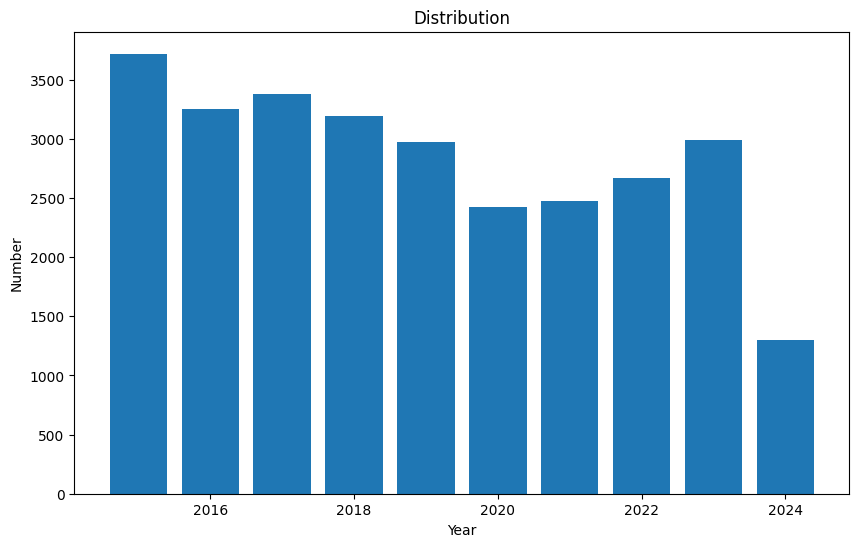

In [ ]:
toll_roads_df['date'] = pd.to_datetime(toll_roads_df['date'], errors='coerce')
toll_roads_df['year'] = toll_roads_df['date'].dt.year

distribution = toll_roads_df.groupby('year').size()

plt.figure(figsize=(10, 6))
plt.bar(distribution.index, distribution.values)
plt.xlabel('Year')
plt.ylabel('Number')
plt.title('Distribution')
plt.show()

C:\Users\Настя\AppData\Local\Temp\ipykernel_24856\4260755446.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  toll_roads_df['date'] = pd.to_datetime(toll_roads_df['date'], errors='coerce')
C:\Users\Настя\AppData\Local\Temp\ipykernel_24856\4260755446.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  toll_roads_df['year'] = toll_roads_df['date'].dt.year
C:\Users\Настя\AppData\Local\Temp\ipykernel_24856\4260755446.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

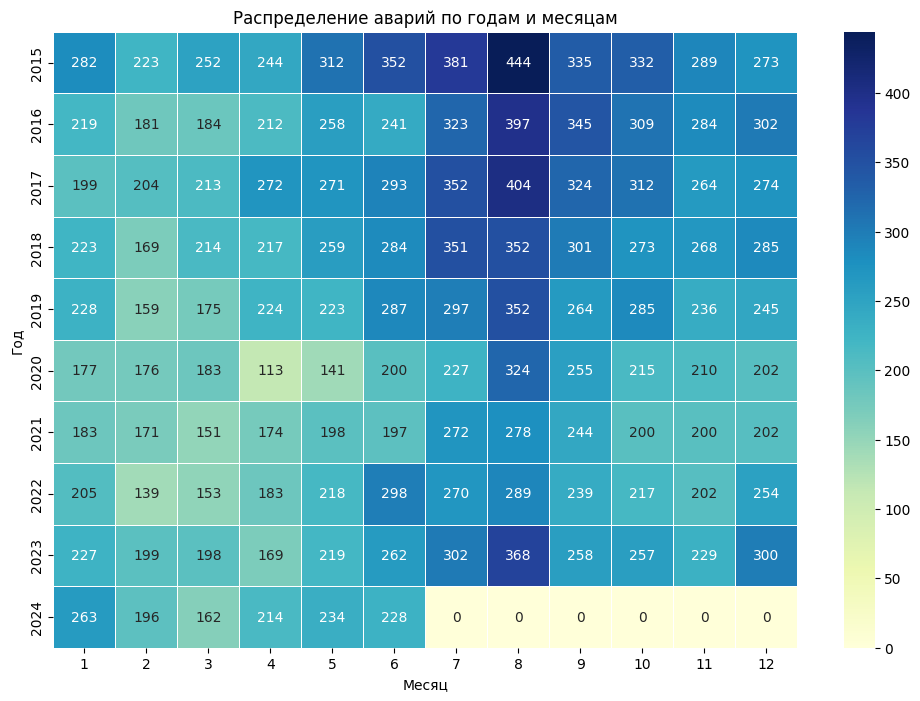

In [80]:
toll_roads_df['date'] = pd.to_datetime(toll_roads_df['date'], errors='coerce')
toll_roads_df['year'] = toll_roads_df['date'].dt.year
toll_roads_df['month'] = toll_roads_df['date'].dt.month

accidents_by_year_month = toll_roads_df.groupby(['year', 'month']).size()

import seaborn as sns
import matplotlib.pyplot as plt

accidents_by_year_month = accidents_by_year_month.unstack(fill_value=0)

plt.figure(figsize=(12, 8))
sns.heatmap(accidents_by_year_month, annot=True, cmap='YlGnBu', fmt='d', linewidths=0.5)

plt.title('Распределение аварий по годам и месяцам')
plt.xlabel('Месяц')
plt.ylabel('Год')
plt.show()

In [17]:
toll_roads_df[toll_roads_df['dor'] == 'М-4 Дон Москва - Воронеж - Ростов-на-Дону - Краснодар – Новороссийск (основное направление)']['km'].value_counts()

km
523.0     46
1413.0    42
524.0     36
993.0     33
1049.0    32
          ..
1466.0     1
410.0      1
367.0      1
1124.0     1
351.0      1
Name: count, Length: 1400, dtype: int64

In [18]:
df_km_M4 = pd.DataFrame(toll_roads_df[toll_roads_df['dor'] == 'М-4 Дон Москва - Воронеж - Ростов-на-Дону - Краснодар – Новороссийск (основное направление)']['km'].value_counts())
df_km_M4 = df_km_M4.reset_index()
df_km_M4 = df_km_M4.sort_values(by='km')
df_km_M4['group'] = df_km_M4.index // 10

df_grouped = df_km_M4.groupby('group').agg({'km': 'first', 'count': 'sum'}).reset_index(drop=True)

df_grouped

,km,count
0,523.0,336
1,314.0,247
2,377.0,205
3,240.0,186
4,379.0,165
...,...,...
135,144.0,10
136,1.0,10
137,35.0,10
138,63.0,10


In [ ]:
# %pip install osmnx

In [ ]:
import osmnx as ox

# Указываем название дороги (трассы)
road_name = "M-4"

# Получаем все дороги на основе названия
graph = ox.graph_from_place(road_name, network_type='all')
nodes, edges = ox.graph_to_gdfs(graph)

# Для извлечения координат из линий дорог
road_coords = edges.geometry.apply(lambda x: list(x.coords))

# Печать координат
for coord_list in road_coords:
    for coord in coord_list:
        print(coord)

In [ ]:
import osmnx as ox

# Используем фильтр по тегу "highway" и номеру трассы "M-4 Дон"
tags = {'highway': 'motorway', 'ref': 'M-4'}

# Получаем граф для дорог, соответствующих этим тегам
graph = ox.graph_from_place('Russia', custom_filter=tags)

# Преобразуем граф в GeoDataFrame, чтобы работать с геометриями
nodes, edges = ox.graph_to_gdfs(graph)

# Извлекаем координаты из линий дорог
road_coords = edges.geometry.apply(lambda x: list(x.coords))

# Печать координат
for coord_list in road_coords:
    for coord in coord_list:
        print(coord)